Lettura DataSet

In [1]:
import pandas as pd 

df_classes = pd.read_csv("elliptic_txs_classes.csv")
df_edgelist = pd.read_csv("elliptic_txs_edgelist.csv")
df_features = pd.read_csv("elliptic_txs_features.csv",header=None)


In [2]:

df_classes = df_classes.loc[df_classes.iloc[:, 1] != 'unknown']

nodi_da_mantenere = set(df_classes['txId'])

df_edgelist = df_edgelist[df_edgelist['txId1'].isin(nodi_da_mantenere) & df_edgelist['txId2'].isin(nodi_da_mantenere)]


Rete 

Graph with 35874 nodes and 36624 edges


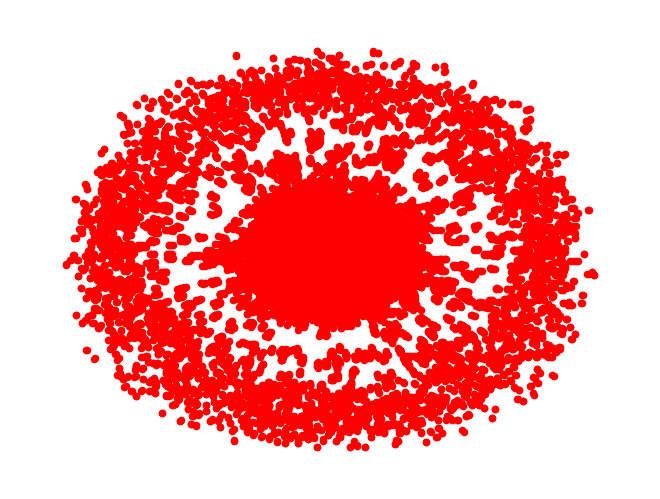

In [3]:
import networkx as nx

import matplotlib.pyplot as plt  # Solo se desideri visualizzare il grafico


# Crea un grafo non diretto da edgelist
G = nx.from_pandas_edgelist(df_edgelist, 'txId1', 'txId2')

print(G)


# Disegna il grafo
pos = nx.spring_layout(G)  # Posiziona i nodi in modo che siano ben distribuiti

# Disegna i nodi senza etichette
nx.draw(G, pos, with_labels=False, node_size=20, node_color='red')

# Disegna gli archi
nx.draw_networkx_edges(G, pos, width=0.02, edge_color='gray')

# Mostra il grafico
plt.axis('off')  # Nasconde gli assi
plt.show()

In [4]:
import networkx as nx

G = nx.from_pandas_edgelist(df_edgelist, 'txId1', 'txId2')
print(G)

# Calcola la centralità di grado per ogni nodo
degree_centrality = nx.degree_centrality(G)

# Calcola la closeness centrality per ogni nodo
closeness_centrality = nx.closeness_centrality(G)

# Calcola la betweenness centrality per ogni nodo
betweenness_centrality = nx.betweenness_centrality(G)

# Calcola la eigenvector centrality per ogni nodo
eigenvector_centrality = nx.eigenvector_centrality(G)

# Calcola il clustering coefficient per ogni nodo
clustering_coefficient = nx.clustering(G)



# Aggiungi il clustering coefficient come feature ai nodi

nx.set_node_attributes(G, clustering_coefficient, 'clustering_coefficient')
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G, eigenvector_centrality, 'eigenvector_centrality')



for node_id in G.nodes:
    node_features = G.nodes[node_id]
    print("Features del nodo", node_id, ":", node_features)


Graph with 35874 nodes and 36624 edges
Features del nodo 232344069 : {'clustering_coefficient': 0, 'degree_centrality': 5.575223705851197e-05, 'closeness_centrality': 0.00481489196023026, 'betweenness_centrality': 1.9847124978735444e-06, 'eigenvector_centrality': 8.99953880059104e-14}
Features del nodo 27553029 : {'clustering_coefficient': 0, 'degree_centrality': 5.575223705851197e-05, 'closeness_centrality': 0.005565287663603146, 'betweenness_centrality': 3.966316597159973e-06, 'eigenvector_centrality': 1.4118557725162496e-12}
Features del nodo 3881097 : {'clustering_coefficient': 0, 'degree_centrality': 5.575223705851197e-05, 'closeness_centrality': 0.007832378870796033, 'betweenness_centrality': 3.966316597159974e-06, 'eigenvector_centrality': 3.399042555392342e-10}
Features del nodo 232457116 : {'clustering_coefficient': 0, 'degree_centrality': 5.575223705851197e-05, 'closeness_centrality': 0.006423478890510347, 'betweenness_centrality': 1.984712497873545e-06, 'eigenvector_centrali